In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model, load_model

In [3]:
PATH_MODEL = 'saved_models/cifar10_improved.h5'

In [4]:
# load cifar10 data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# divide by 255 (rgb color)
x_train, x_test = x_train/255, x_test/255

# preview data
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


In [5]:
# convert y-values' dimensions
y_train, y_test = np.squeeze(y_train, -1), np.squeeze(y_test, -1)

# preview x data
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000,)
y_test shape:  (10000,)


In [6]:
# get & display number of classes
k_train, k_test = len(set(y_train)), len(set(y_test))
print('y_train classes: ', k_train)
print('y_test classes: ', k_test)

y_train classes:  10
y_test classes:  10


In [11]:
# build model
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k_train, activation='softmax')(x)

model = Model(i, x)

In [12]:
# compile & fit model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

# save model
# model.save(PATH_MODEL)

# load model
# model = load_model(PATH_MODEL)

Epoch 1/15


2022-08-26 21:15:15.092196: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 67s 43ms/step - loss: 1.3074 - accuracy: 0.5502 - val_loss: 1.1496 - val_accuracy: 0.5957
Epoch 2/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8569 - accuracy: 0.7041 - val_loss: 0.8160 - val_accuracy: 0.7249
Epoch 3/15
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6954 - accuracy: 0.7612 - val_loss: 0.7134 - val_accuracy: 0.7627
Epoch 4/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.5860 - accuracy: 0.7999 - val_loss: 0.7067 - val_accuracy: 0.7619
Epoch 5/15
1563/1563 [==============================] - 128s 82ms/step - loss: 0.5015 - accuracy: 0.8295 - val_loss: 0.7058 - val_accuracy: 0.7697
Epoch 6/15
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4239 - accuracy: 0.8530 - val_loss: 0.6686 - val_accuracy: 0.7877
Epoch 7/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.3609 - accuracy: 0.8748 - val_loss: 0.6997 - val_accur

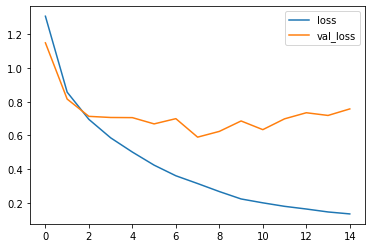

In [13]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

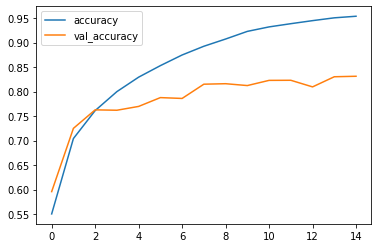

In [14]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()